In [ ]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from PIL import Image
from torchvision.datasets import CIFAR10

In [10]:
# Load dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

In [11]:
classes = trainset.classes
class_to_idx = trainset.class_to_idx

classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

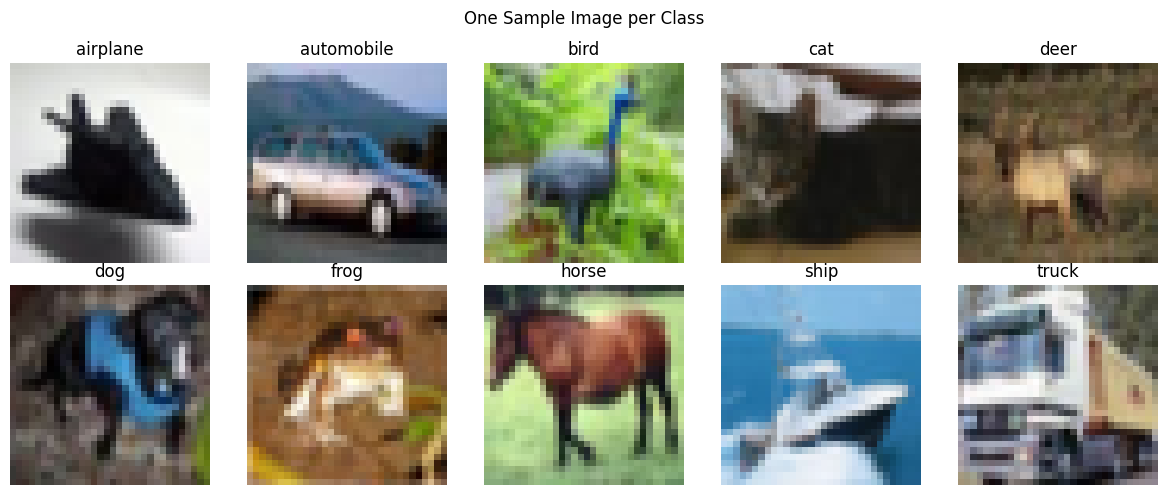

In [12]:
# --------------------------------------
# 1. Sample images per class
# --------------------------------------
def plot_samples_per_class(dataset, classes):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    class_seen = set()
    for img, label in dataset:
        class_name = classes[label]
        if class_name not in class_seen:
            idx = classes.index(class_name)
            ax = axes[idx // 5][idx % 5]
            ax.imshow(img.permute(1, 2, 0))
            ax.set_title(class_name)
            ax.axis("off")
            class_seen.add(class_name)
        if len(class_seen) == len(classes):
            break
    plt.suptitle("One Sample Image per Class")
    plt.tight_layout()
    plt.show()

plot_samples_per_class(trainset, classes)

/var/folders/r6/pwrr7nj15v1d05ch0pmkw08r0000gn/T/ipykernel_5384/3434009700.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=[label_counts[i] for i in range(10)], palette="Set3")


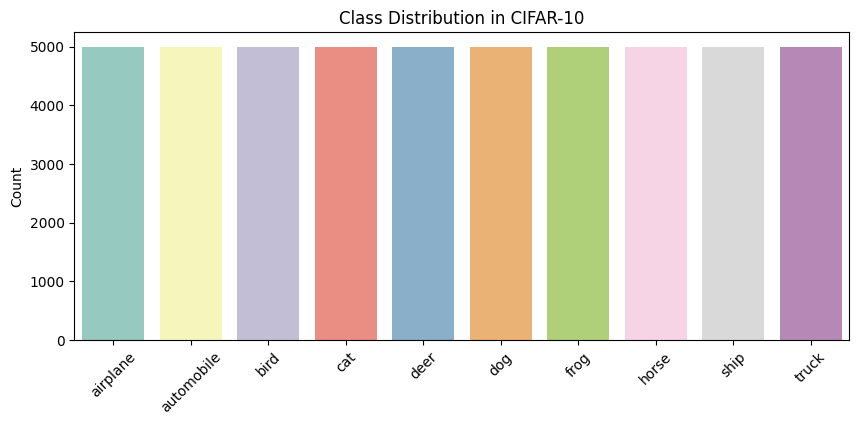

In [13]:
# --------------------------------------
# 2. Class Distribution
# --------------------------------------
labels = [label for _, label in trainset]
label_counts = Counter(labels)

plt.figure(figsize=(10, 4))
sns.barplot(x=classes, y=[label_counts[i] for i in range(10)], palette="Set3")
plt.title("Class Distribution in CIFAR-10")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

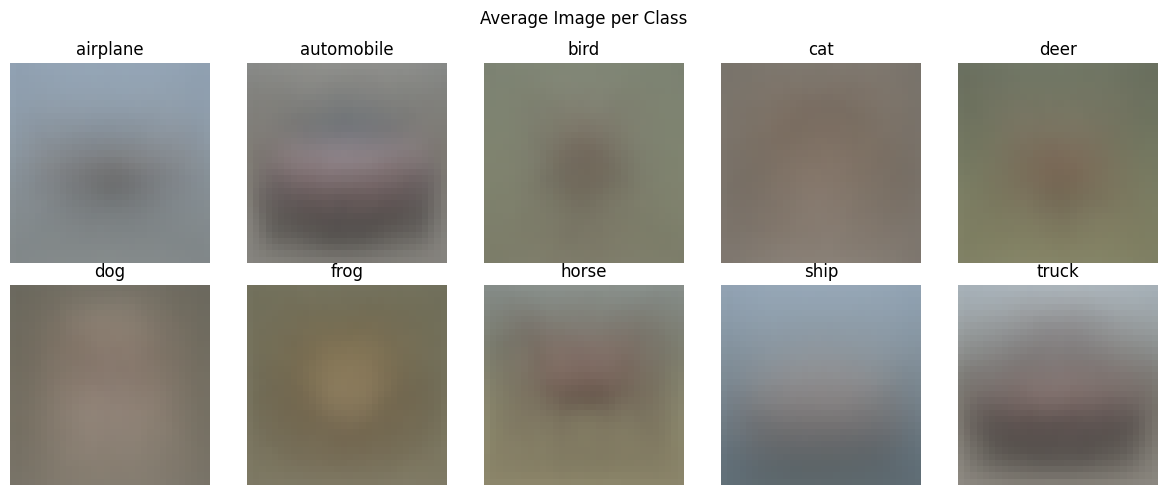

In [16]:
# --------------------------------------
# 3. Average image per class
# --------------------------------------
avg_images = torch.zeros(10, 3, 32, 32)
counts = torch.zeros(10)

for img, label in trainset:
    avg_images[label] += img
    counts[label] += 1

avg_images /= counts.view(-1, 1, 1, 1)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    ax = axes[i // 5][i % 5]
    img = avg_images[i].permute(1, 2, 0).numpy()
    ax.imshow(img)
    ax.set_title(classes[i])
    ax.axis("off")

plt.suptitle("Average Image per Class")
plt.tight_layout()
plt.show()

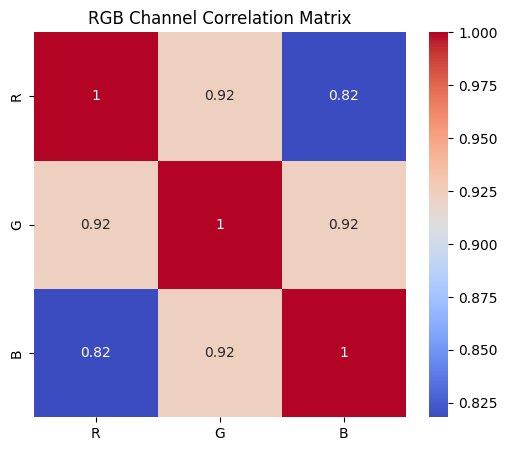

In [ ]:
# --------------------------------------
# 4. Channel Correlation Matrix
# --------------------------------------
rgb_flat = imgs.view(-1, 3).numpy()
corr_matrix = np.corrcoef(rgb_flat.T)

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, xticklabels=['R', 'G', 'B'], yticklabels=['R', 'G', 'B'], cmap='coolwarm')
plt.title("RGB Channel Correlation Matrix")
plt.show()